In [1]:
%matplotlib inline

# Load images and crop it


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import crop
from skimage import transform
import pydicom
from pydicom.data import get_testdata_files
#import sys
import glob
import os

os.chdir('/Users/maigva/Documents/Notebooks/datosCRX/scans')
# load the DICOM files.... esto se tiene que acoplar a la estructura del ficheros de XNAT
list_files=glob.glob('*/**/*.dcm')
files = []

for fname in (list_files):
    print("loading: {}".format(fname))
    files.append(pydicom.dcmread(fname))
    #print(files)




loading: 1_2_840_113654_2_70_1_138418922933951907329012811305135075746_unknown/DICOM/1.2.840.113654.2.70.1.319561931234443753194831715283782674818-no-value-for-SeriesNumber-no-value-for-InstanceNumber-14hpl1e.dcm
loading: 1_2_840_113654_2_70_1_82672655699587756261940960377397784104_unknown/DICOM/1.2.840.113654.2.70.1.1763980838673932506842272608457855133-1-1-1a2u1xp.dcm
loading: 1_2_840_113654_2_70_1_82672655699587756261940960377397784104_unknown/DICOM/1.2.840.113654.2.70.1.319561931234443753194831715283782674818-no-value-for-SeriesNumber-no-value-for-InstanceNumber-xqnthg.dcm
loading: 1526/DICOM/1.2.840.113654.2.70.1.272773262678460368037194344695166264715-1526-1-jrg3gy.dcm
loading: 1526/DICOM/1.2.840.113654.2.70.1.272773262678460368037194344695166264715-1526-2-x6inqm.dcm


## Disponemos de conjunto de imagenes algunas identificada y otras no

file count: 5


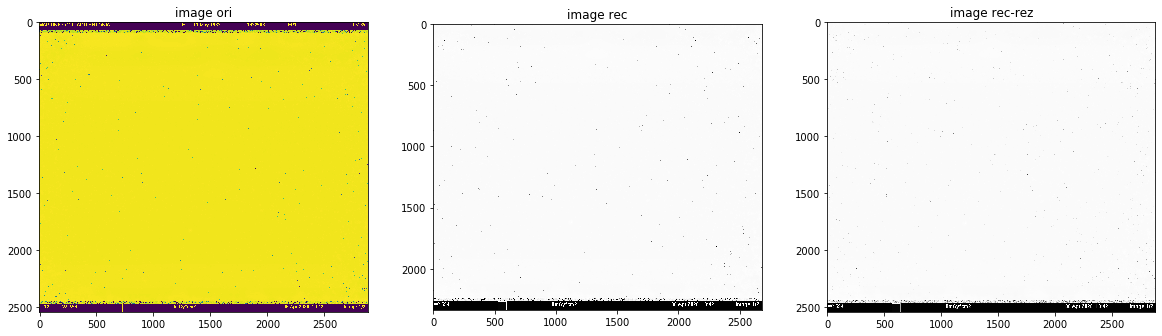

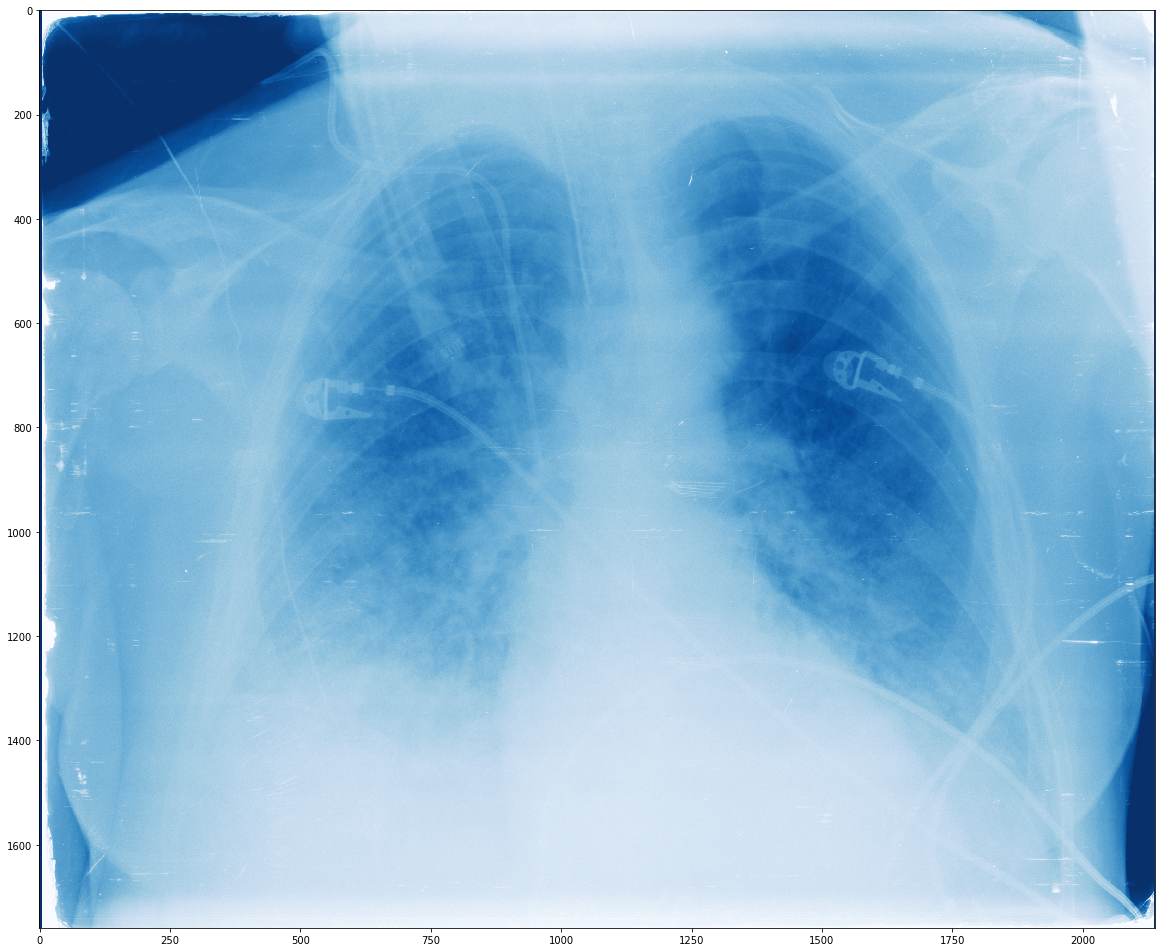

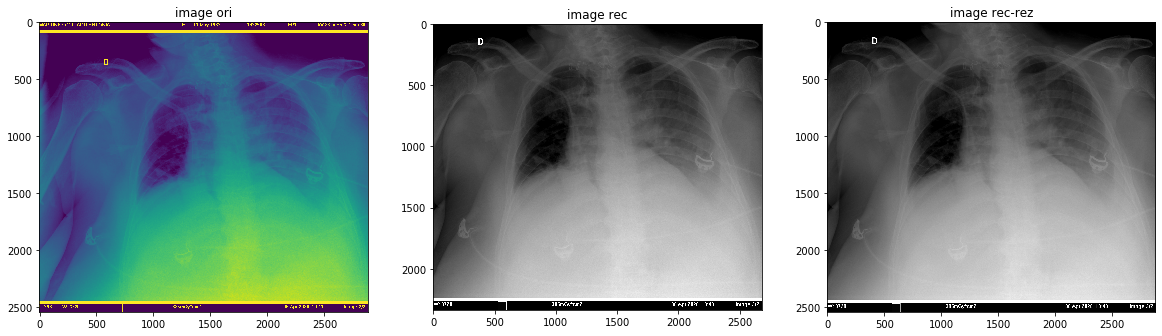

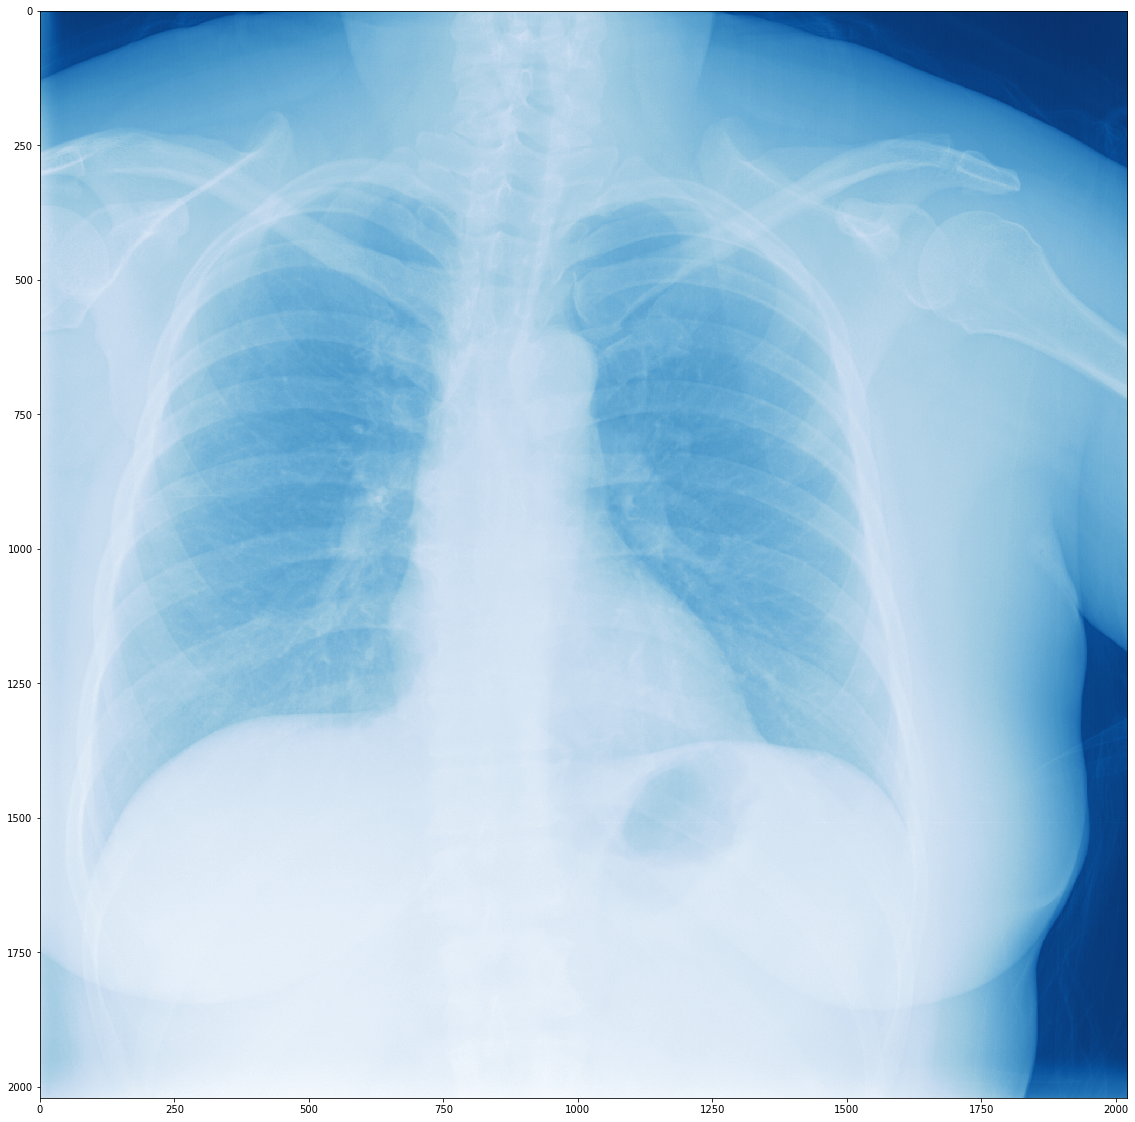

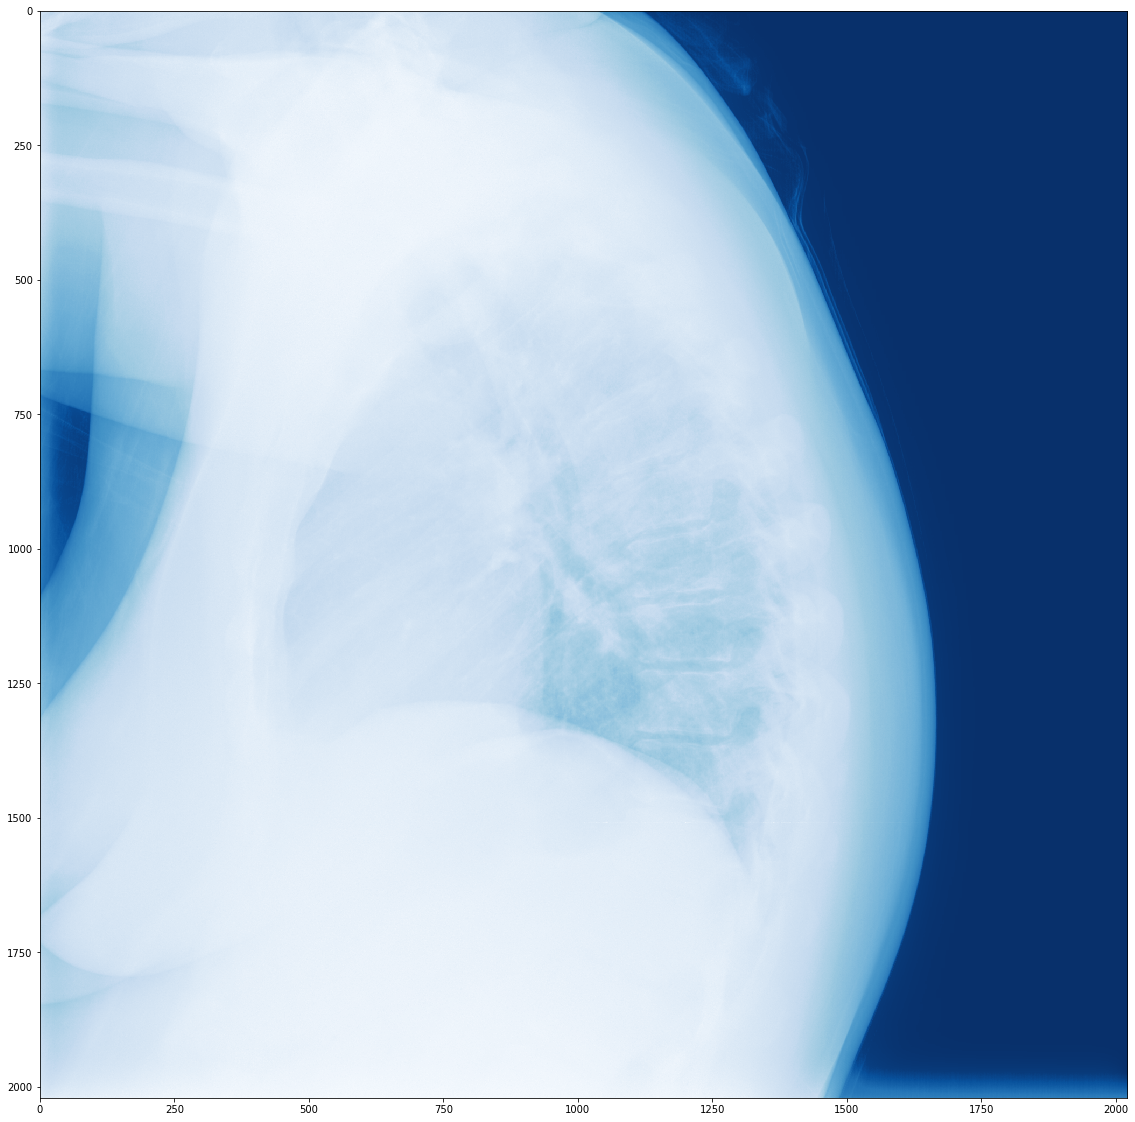

In [24]:
print("file count: {}".format(len(files)))

for i, s in enumerate(files):
    if (files[i][0x0008, 0x1090].value=="RX_ELX04"):
        img2d_list = files[i].pixel_array
        B = crop(img2d_list, ((200, 0)))
        C = transform.resize(B,img2d_list.shape)
        # imprimir solo para verificar
        fig2, (ax1,ax2,ax3) = plt.subplots(ncols=3, nrows=1, figsize =(20,20))
        ax1.set_title('image ori')
        ax1.imshow(img2d_list)
        ax2.set_title('image rec')
        ax2.imshow(B, cmap='gray')
        ax3.set_title('image rec-rez')
        ax3.imshow(C, cmap='gray')
    else:
        fig3,(ax1)= plt.subplots(ncols=1, nrows=1, figsize =(20,20))
        ax1.imshow(files[i].pixel_array, cmap ='Blues_r')
        